# HERA Data Analysis Part I

## Workshop Leaders: Carina & Josh

# A) Warm-Up

Load HERA data file `zen.2458098.40887.xx.HH.uvOCR` (which is on your laptop in the `data` folder) using the `read_miriad` function from the `UVData` object in the `pyuvdata` module. Then answer these basic questions about the data:

i) Which antennas are there?

ii) How many baselines are there? Does this make sense given the number of antennas?

iii) How many frequencies are there, and what range does it cover (in MHz)? What is the width of each frequency channel (in MHz)?

iv) How many time integrations are there in total?

v) What LSTs are in the data (in hours)? Eliminate repeat entries using `np.unique`.

In [1]:
from pyuvdata import UVData
import numpy as np

# load data here

path = '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_1/2458098/zen.2458098.40887.xx.HH.uvOCR'
uvd = UVData()
uvd.read_miriad(path)

In [2]:
# your answers here (hint: look at the attributes of your uvd object)

print 'There are', len(uvd.antenna_numbers), 'antennas and they are:', uvd.antenna_numbers

print 'There are', uvd.Nbls, 'baselines, which corresponds to N(N-1)/2 cross-correlations plus N auto-correlations.'

print 'There are', uvd.Nfreqs, 'frequencies, covering a range of', \
    np.min(uvd.freq_array)/1e6, 'MHz to',np.max(uvd.freq_array)/1e6,'MHz.'

print 'The width of each frequency channel is', (np.max(uvd.freq_array)-np.min(uvd.freq_array))/uvd.Nfreqs/1e6, 'MHz'

print 'There are', uvd.Ntimes, 'time integrations.'

print 'The LSTs are', np.unique(uvd.lst_array)*12/np.pi, 'in hours.'

There are 52 antennas and they are: [136 140 121  88  41  86  36  51  50  98 123 124  65 137  82 120 143  66
  83 122  67  68  69  70  71  85   0   1  11  12  13  14   2  23  24  25
  26  27  37  38  39  40  52  53  54  55  84  87 141 138 142 139]
There are 1378 baselines, which corresponds to N(N-1)/2 cross-correlations plus N auto-correlations.
There are 1024 frequencies, covering a range of 100.0 MHz to 199.90234375 MHz.
The width of each frequency channel is 0.09756088256835938 MHz
There are 60 time integrations.
The LSTs are [4.56196543 4.56495621 4.56794699 4.57093777 4.57392856 4.57691934
 4.57991012 4.5829009  4.58589169 4.58888247 4.59187325 4.59486403
 4.59785482 4.6008456  4.60383638 4.60682716 4.60981794 4.61280873
 4.61579951 4.61879029 4.62178107 4.62477186 4.62776263 4.63075341
 4.63374419 4.63673498 4.63972576 4.64271654 4.64570732 4.6486981
 4.65168889 4.65467967 4.65767045 4.66066123 4.66365202 4.6666428
 4.66963358 4.67262436 4.67561515 4.67860593 4.68159671 4.684587

# B) Accessing and Visualizing Data and Flags

Let's first look at our antenna layout to get an idea of antenna locations and spacings.

<IPython.core.display.Javascript object>


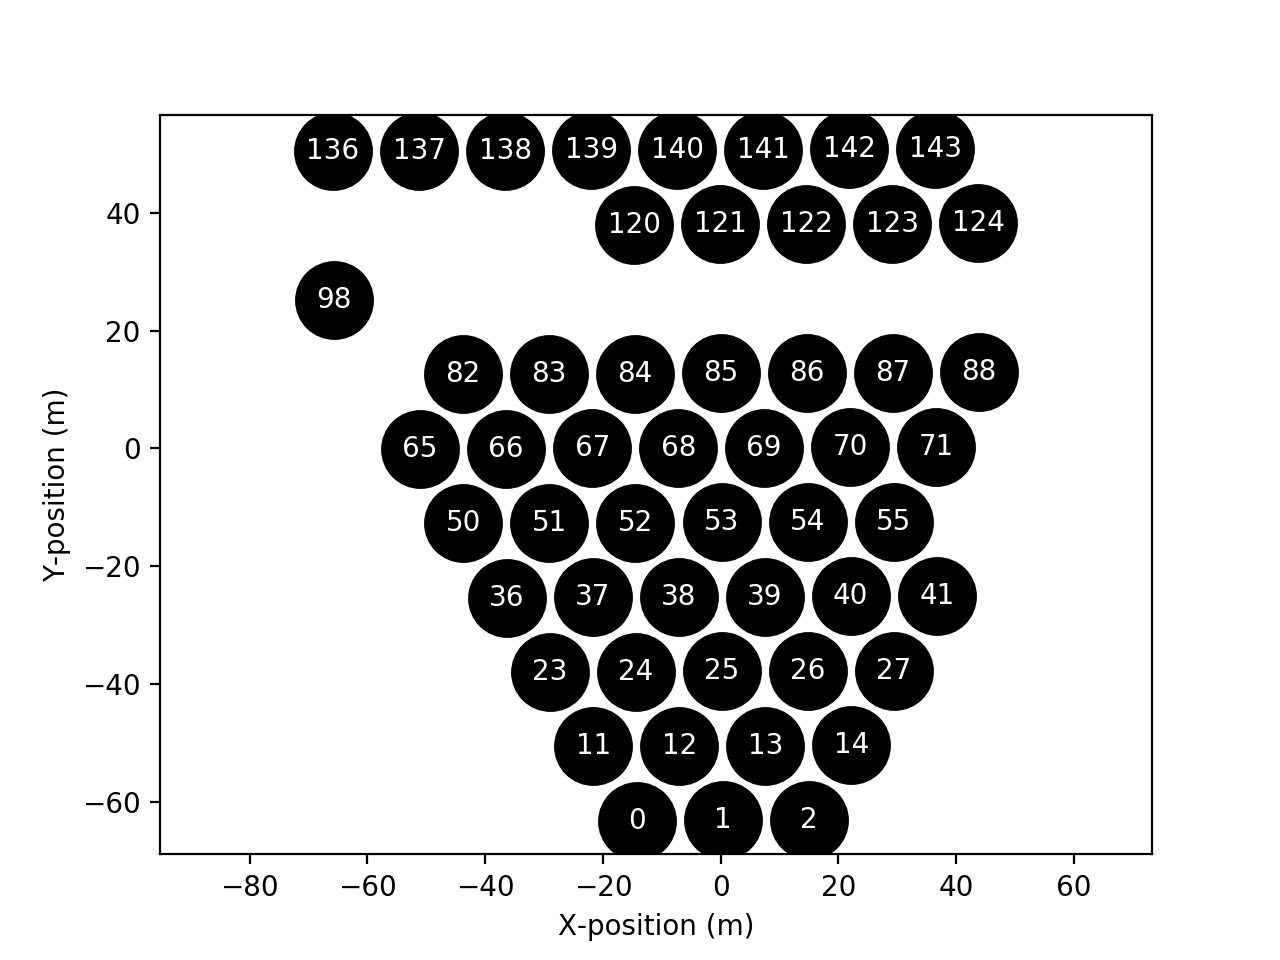

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

antpos, ants = uvd.get_ENU_antpos() # this returns coordinates of each antenna and a list of the antennas

plt.figure()
plt.scatter(antpos[:,0], antpos[:,1], marker='.', color='k', s=3000) # plot the antenna positions with black circles
for aa,ant in enumerate(ants): # loop over antennas
    plt.text(antpos[aa,0], antpos[aa,1], ants[aa], color='w', va='center', ha='center') # label antenna numbers
plt.xlabel('X-position (m)')
plt.ylabel('Y-position (m)')
plt.axis('equal');

Let's now access the visibility data in our file for baseline (65,71), a long E/W baseline, and plot the real and imaginary part of the visibility for the first time integration.

Shape of data: (60, 1024)


<IPython.core.display.Javascript object>


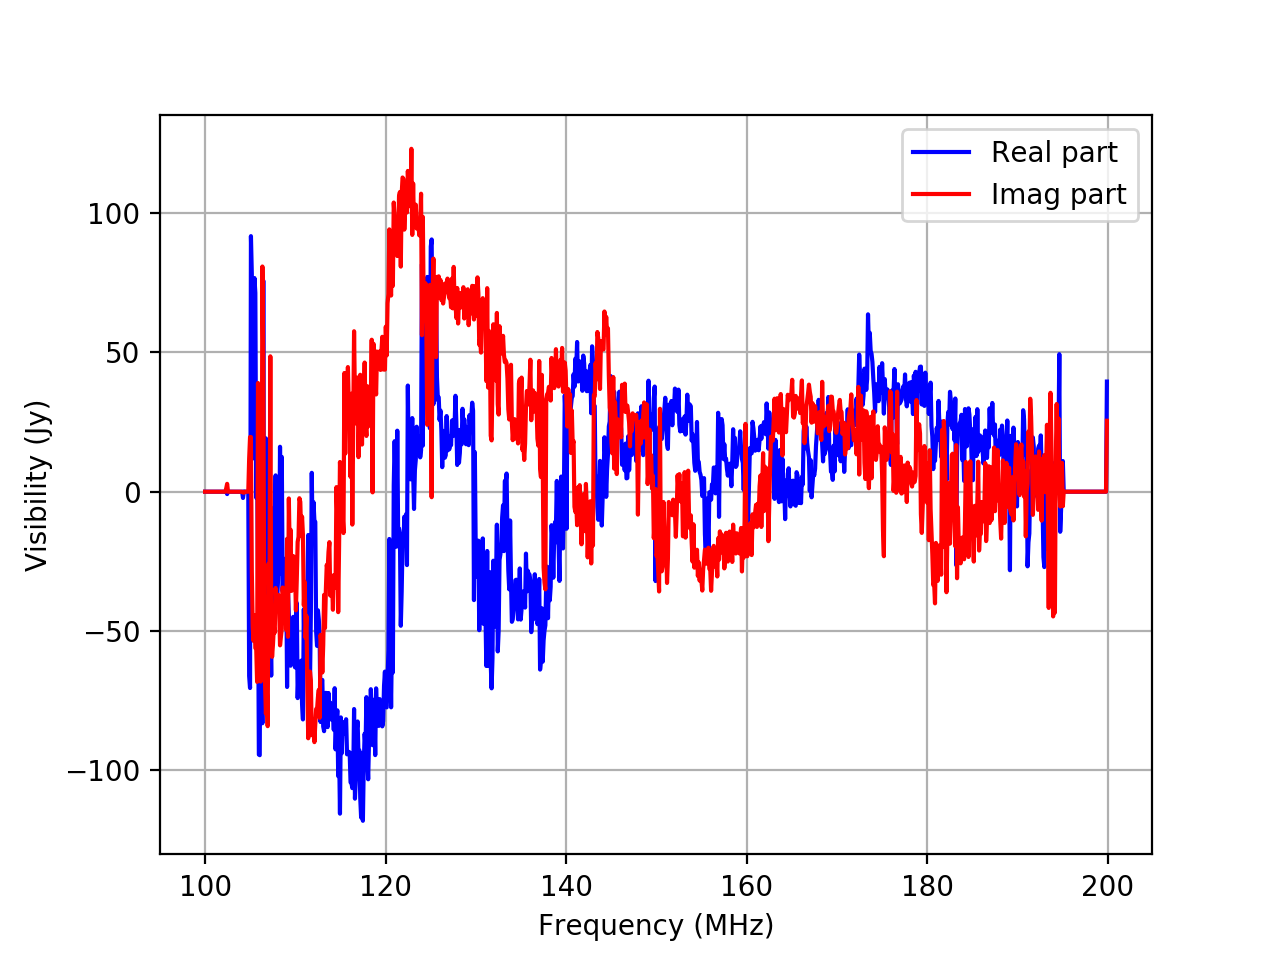

In [5]:
key = (65,71,'xx') # tuple containing baseline and polarization
vis = uvd.get_data(key) # returns data 
print 'Shape of data:', vis.shape # shape of data is (times, freqs)

plt.figure()
plt.plot(uvd.freq_array[0]/1e6, vis[0,:].real, 'b-', label='Real part')
plt.plot(uvd.freq_array[0]/1e6, vis[0,:].imag, 'r-', label='Imag part')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility (Jy)')
plt.grid(); plt.legend();

Exercise: Choose a few frequency channels and plot them as a function of time.

<IPython.core.display.Javascript object>


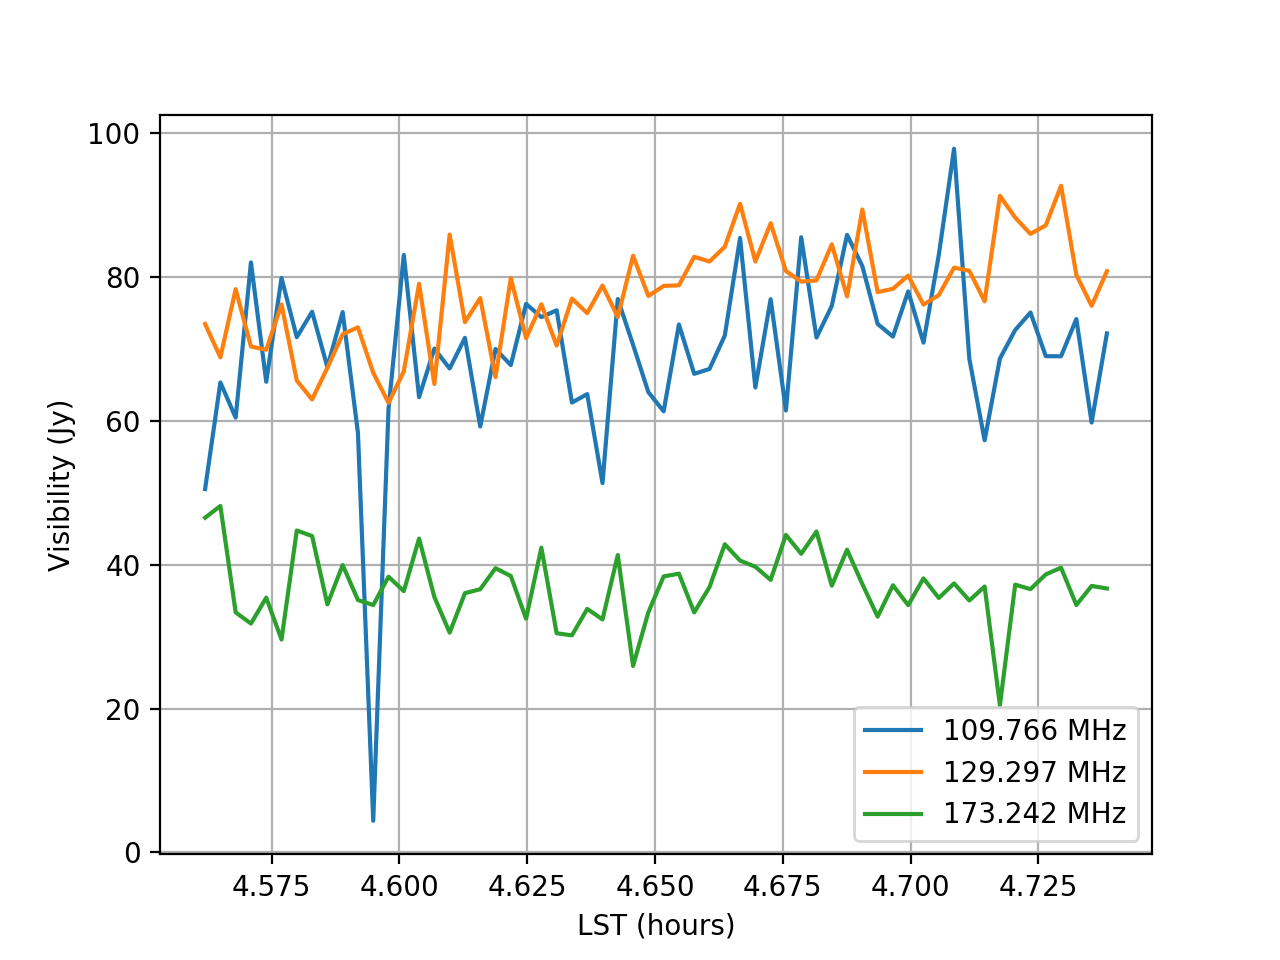

In [6]:
# your answer here 

chans = [100,300,750]
plt.figure()

for chan in chans:
    plt.plot(np.unique(uvd.lst_array)*12/np.pi, np.abs(vis[:,chan]), 
             label=str(np.round(uvd.freq_array[0,chan]/1e6,3)) + ' MHz')
plt.xlabel('LST (hours)')
plt.ylabel('Visibility (Jy)')
plt.grid(); plt.legend();

# C) Waterfall Plots

Another useful way of visualizing our data is to plot it as a waterfall plot. A waterfall plot is a two-dimensional plot of the visibility (the cross-correlated signal between a pair of antennas) as a function of time (y-axis) and frequency (x-axis). We can use the `plt.imshow` to plot the amplitude and phase of the same baseline as above. Note that the keyword `extent` takes in 4 arguments which define the plot axes extent in the order of (xmin, xmax, ymin, ymax), and we've massaged our axes to display frequencies in MHz and times in LST hours.

<IPython.core.display.Javascript object>


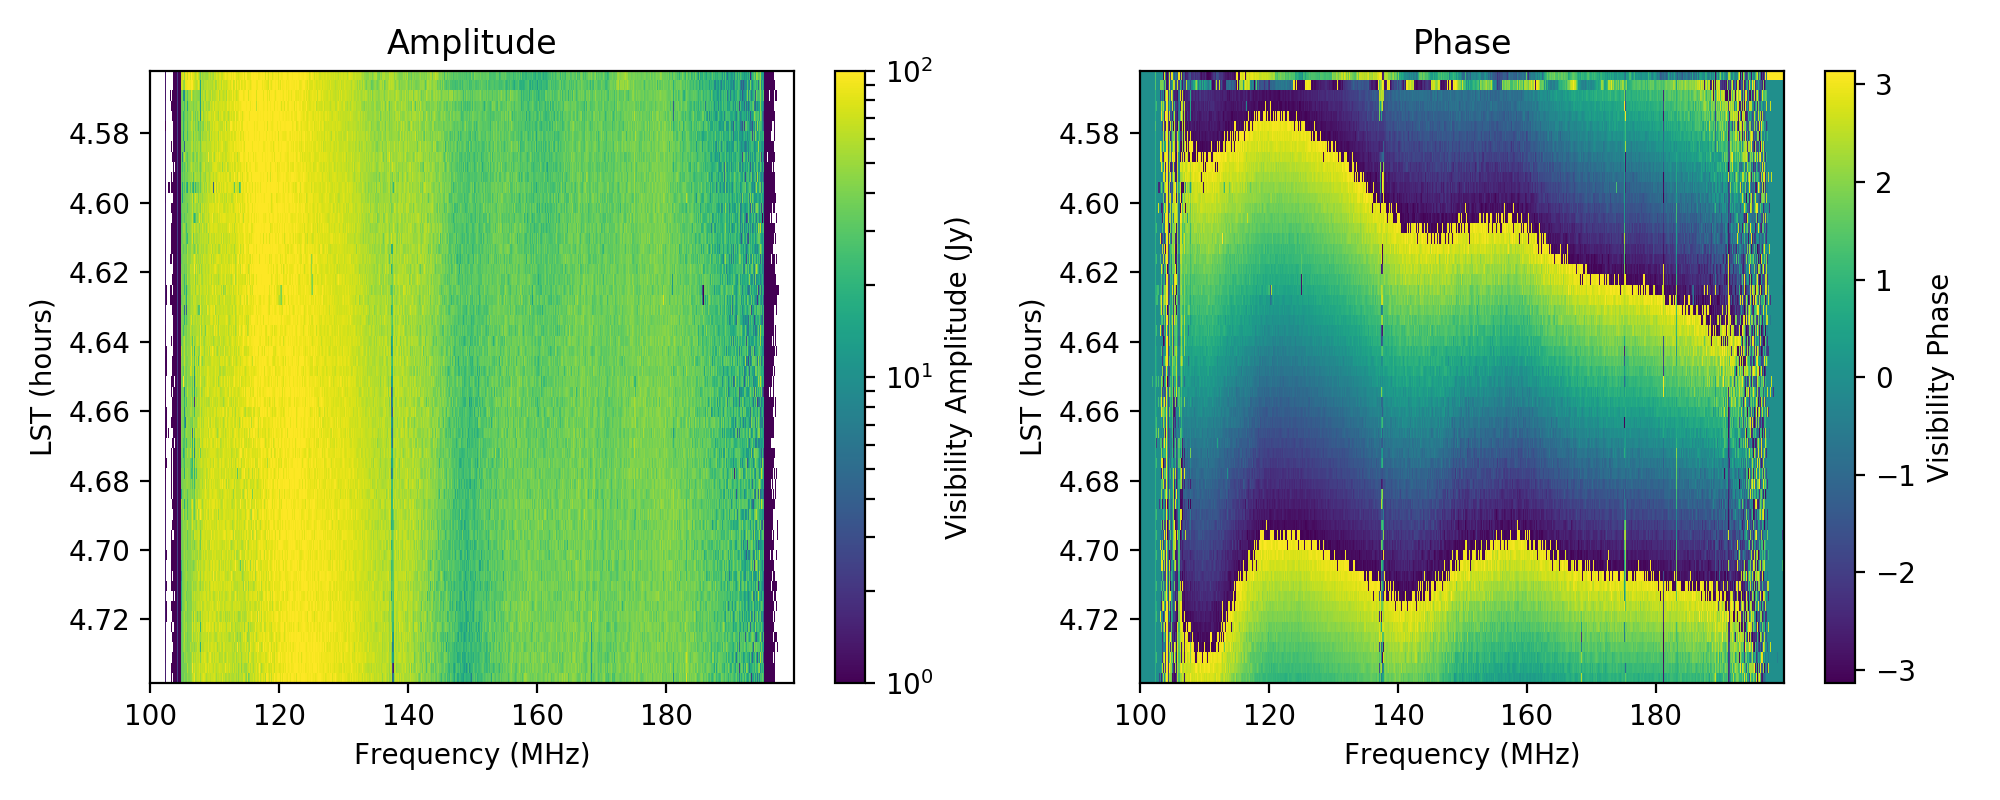

In [7]:
import matplotlib 

# Plot absolute value of visibility
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(np.abs(vis), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Amplitude')

# Plot phase of visibility
plt.subplot(122)
plt.imshow(np.angle(vis), aspect='auto',
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Phase')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Phase')

plt.tight_layout();

Some features to note from the waterfall plots:
* RFI
* Band edges
* Frequency and temporal structure

Exercise: Pick a short baseline and a long baseline of the same orientation. Make waterfall plots (in both amplitude and phase) for both. How do they differ?

<IPython.core.display.Javascript object>


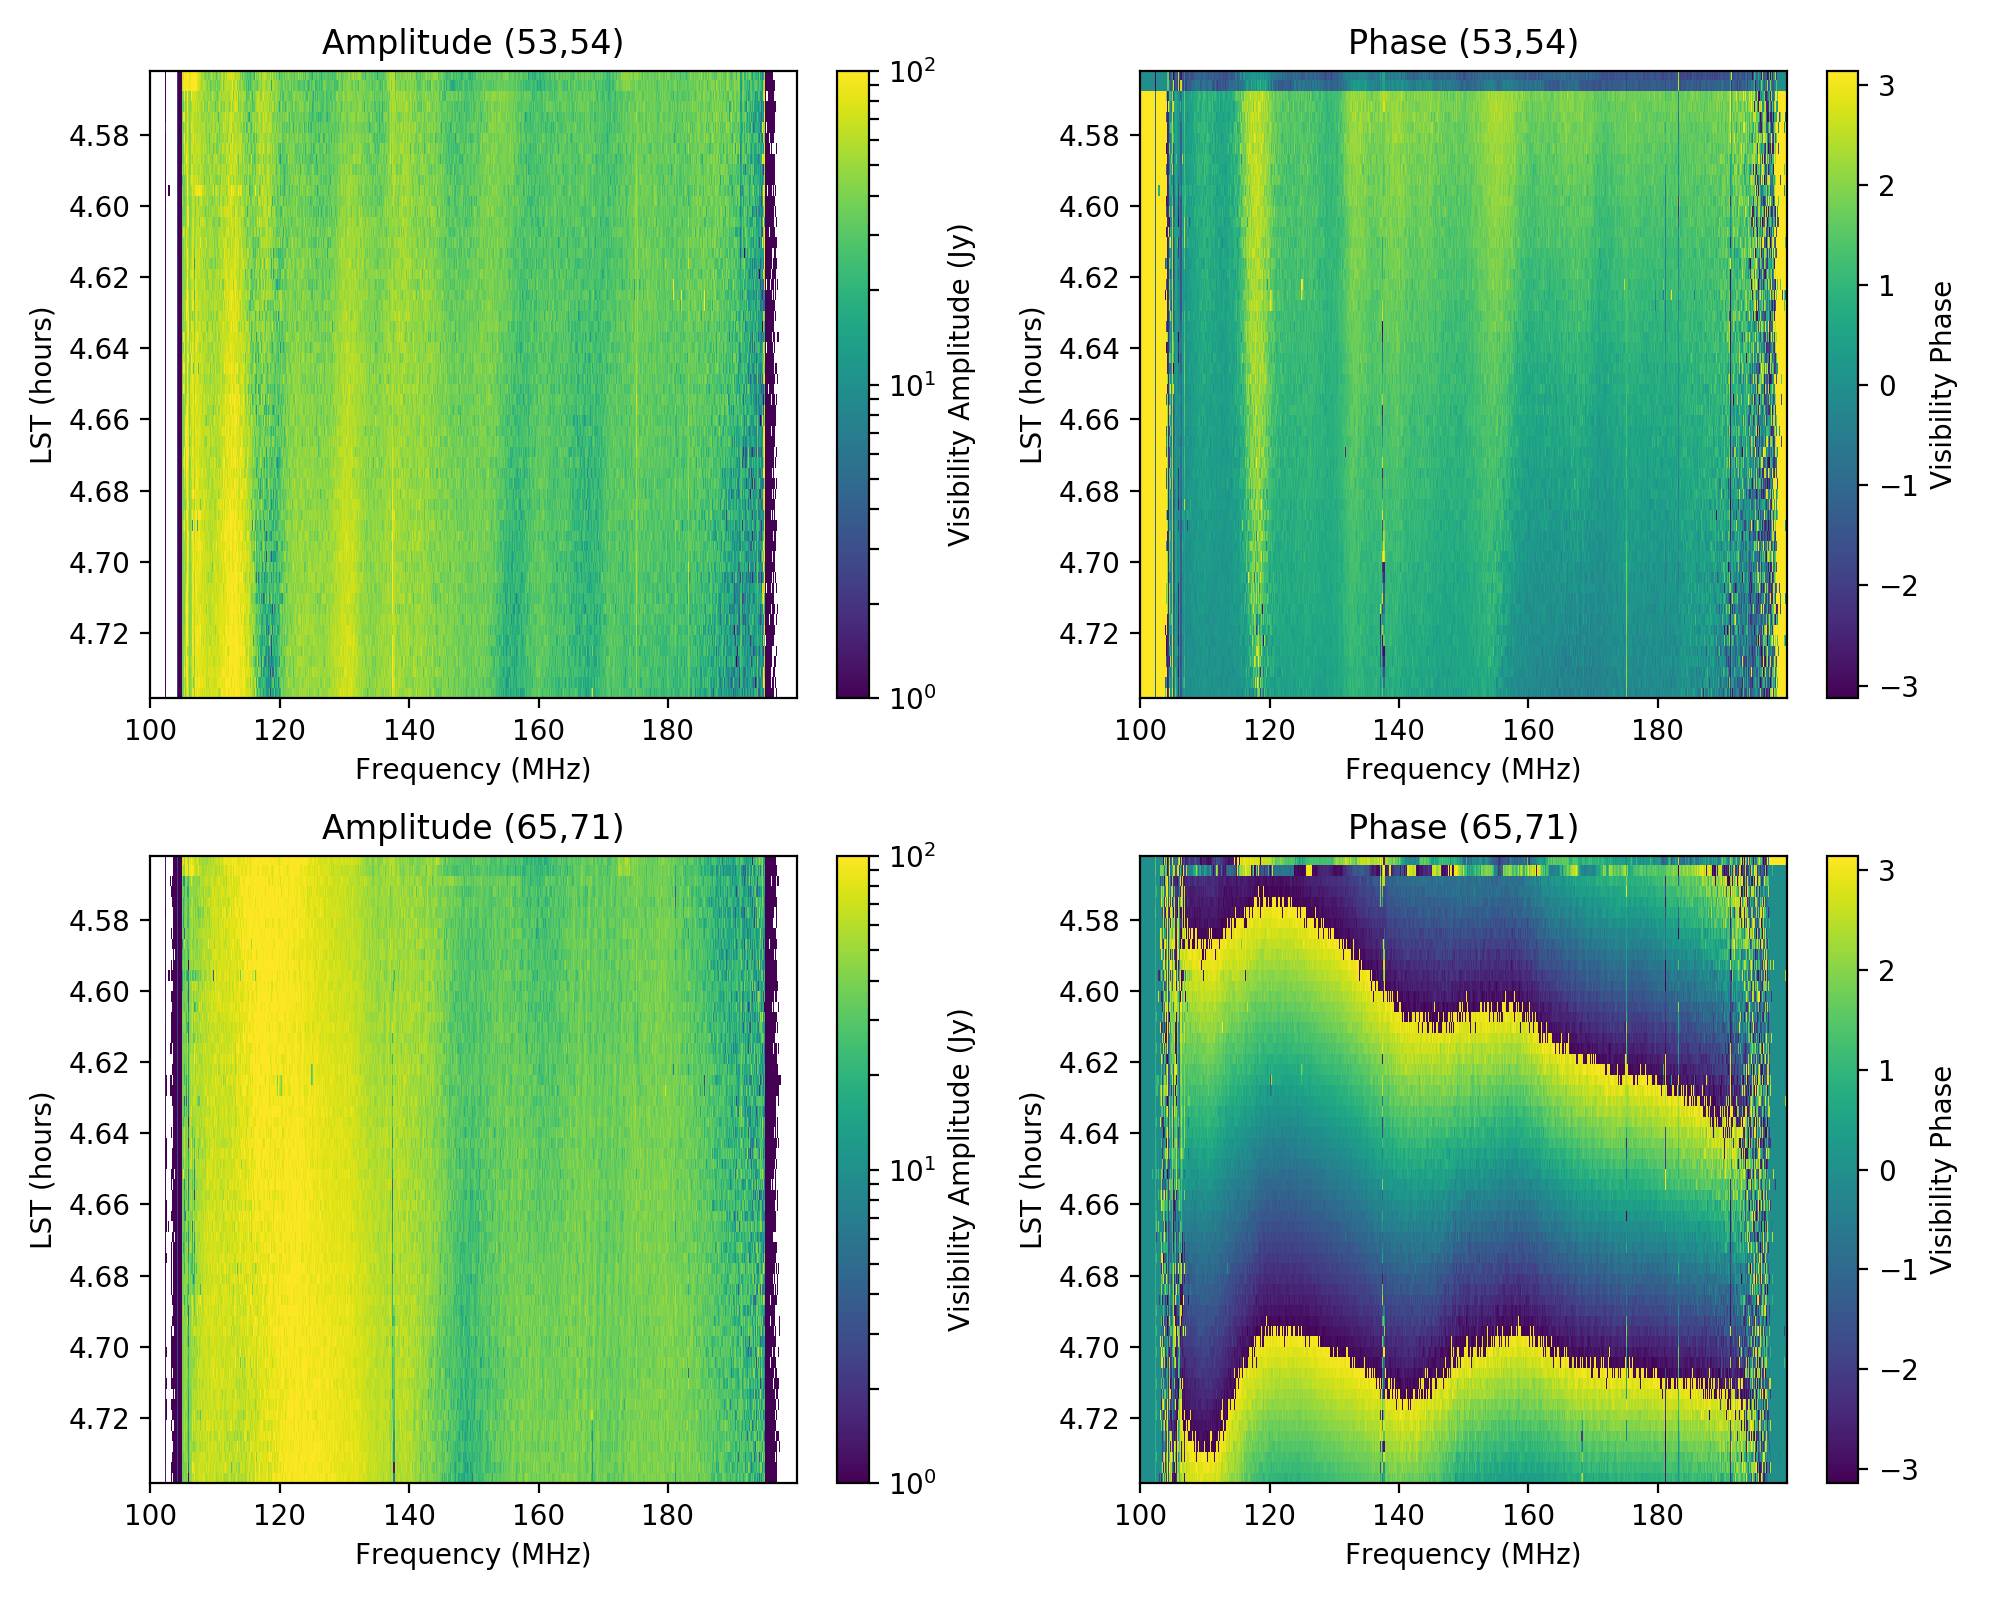

In [8]:
# your answer here

vis1 = uvd.get_data((53,54,'xx')) # short E/W baseline
vis2 = uvd.get_data((65,71,'xx')) # long E/W baseline

plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(np.abs(vis1), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Amplitude (53,54)')

plt.subplot(222)
plt.imshow(np.angle(vis1), aspect='auto',
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Phase')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Phase (53,54)')

plt.subplot(223)
plt.imshow(np.abs(vis2), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Amplitude (65,71)')

plt.subplot(224)
plt.imshow(np.angle(vis2), aspect='auto',
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Phase')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Phase (65,71)')

plt.tight_layout();

Exericse: How do the waterfall plots differ for an E/W baseline vs. a N/S baseline (of approximately similar lengths)? Does this make sense?

<IPython.core.display.Javascript object>


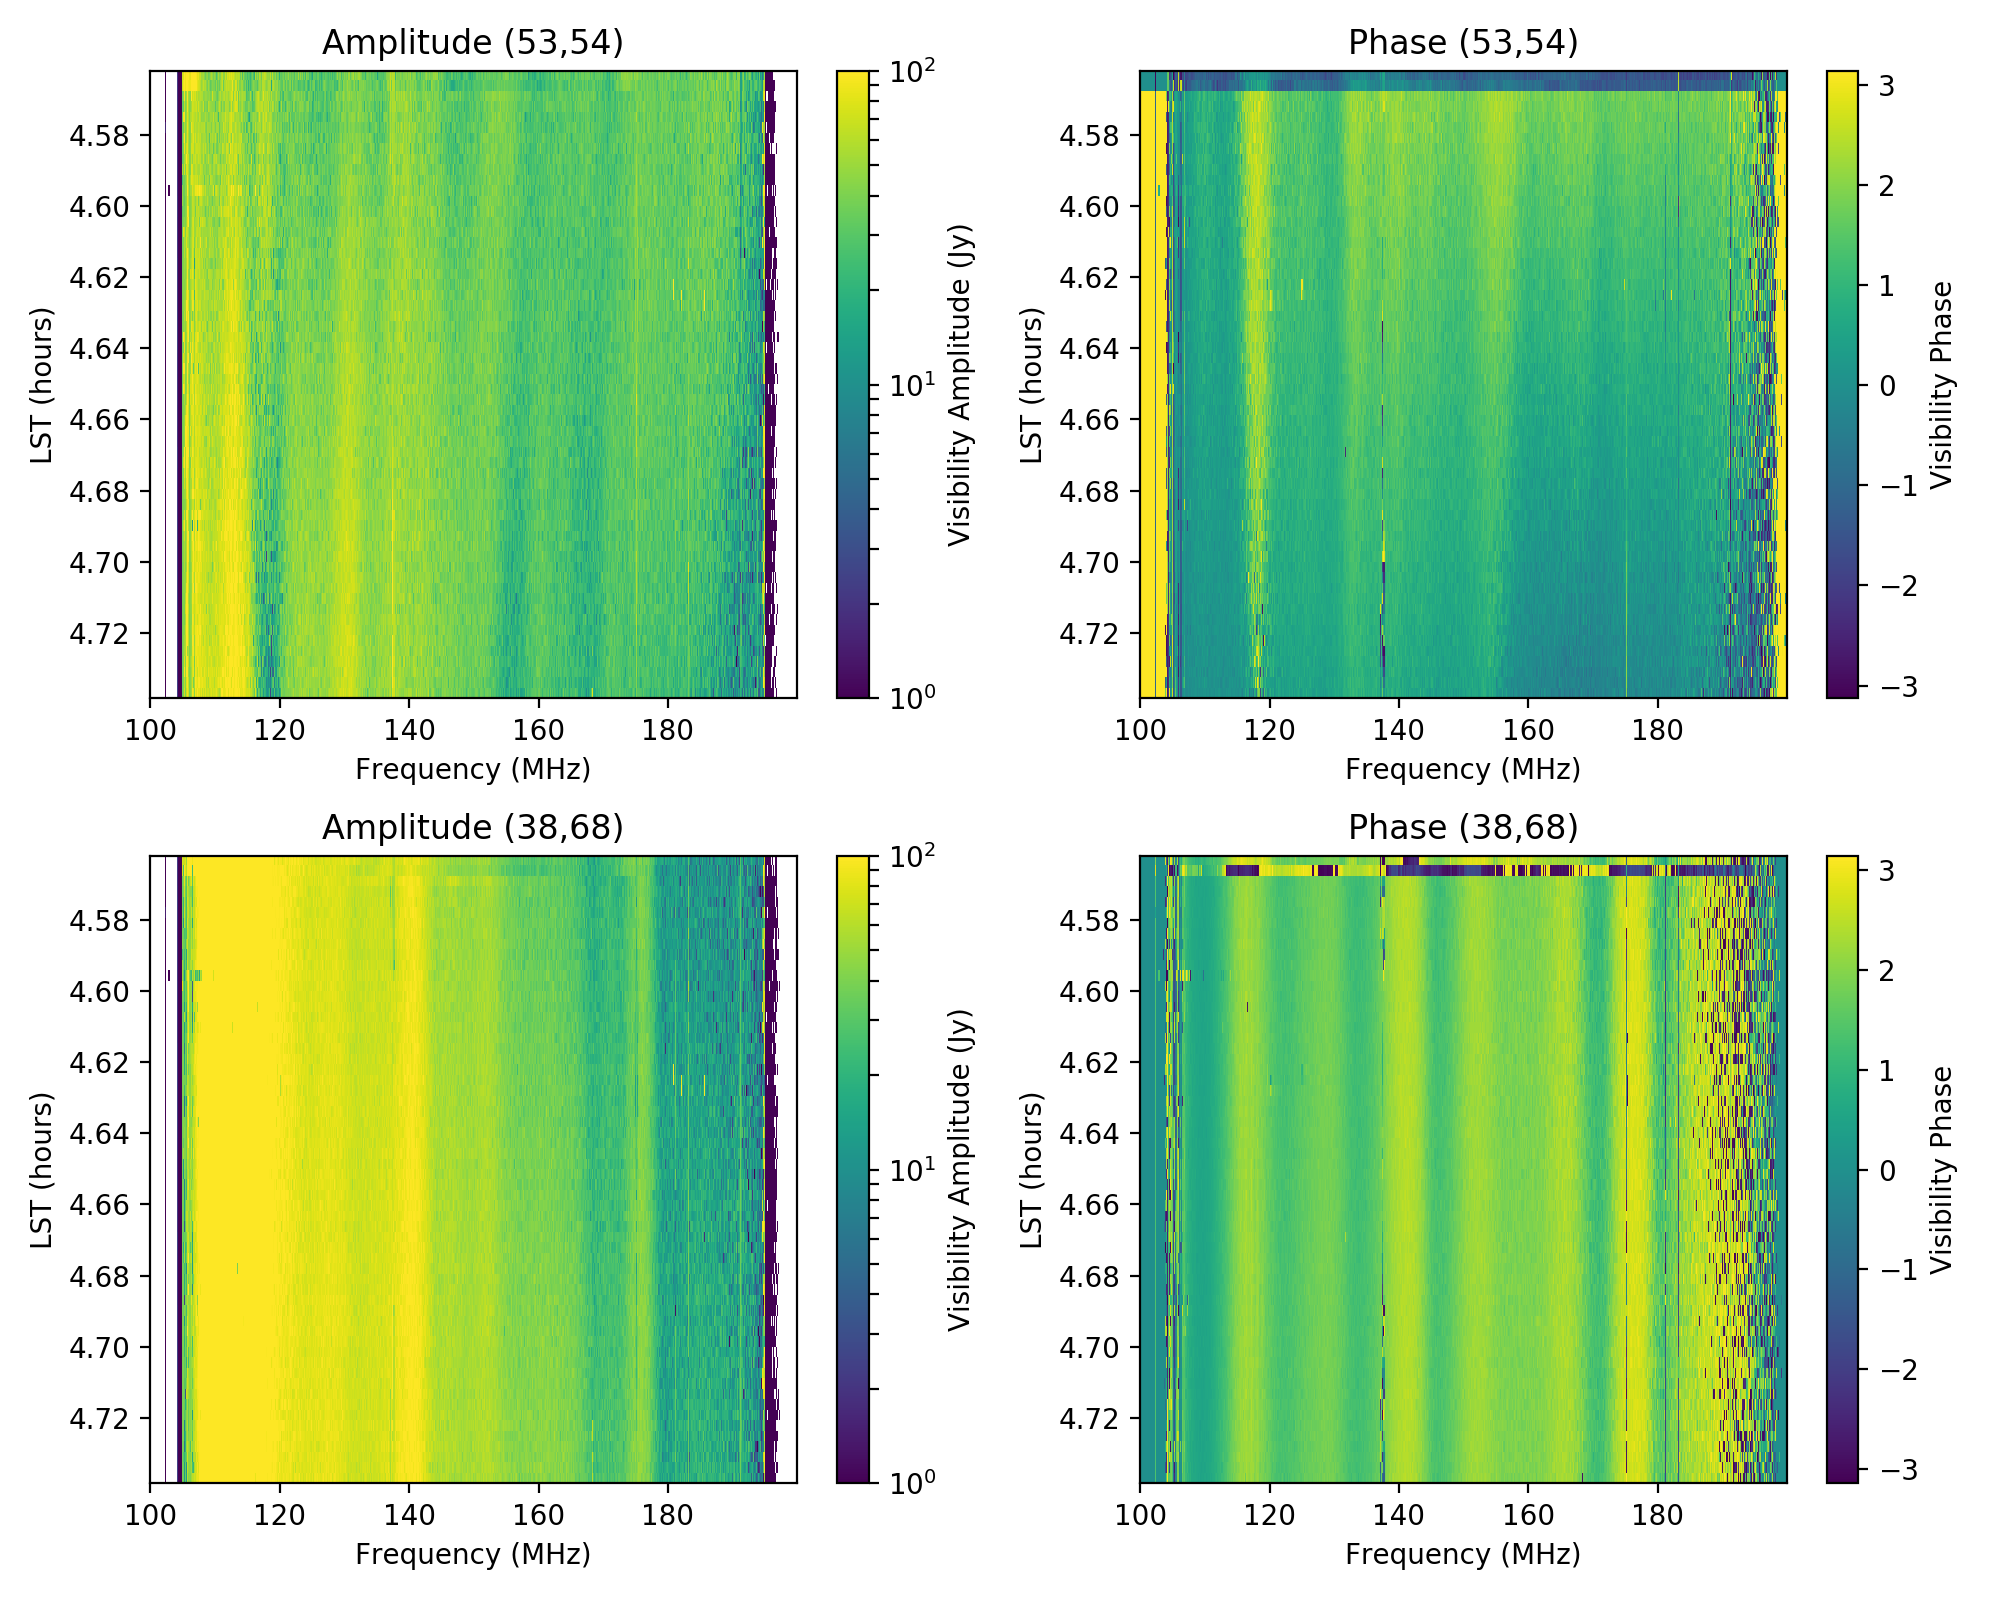

In [9]:
# your answer here
vis1 = uvd.get_data((53,54,'xx')) # short E/W baseline
vis2 = uvd.get_data((38,68,'xx')) # short N/S baseline

plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(np.abs(vis1), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Amplitude (53,54)')

plt.subplot(222)
plt.imshow(np.angle(vis1), aspect='auto',
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Phase')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Phase (53,54)')

plt.subplot(223)
plt.imshow(np.abs(vis2), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Amplitude (38,68)')

plt.subplot(224)
plt.imshow(np.angle(vis2), aspect='auto',
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Phase')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Phase (38,68)')

plt.tight_layout();

# D) The Delay Transform

The delay transform is a clever technique we use to isolate bright foregrounds in our data (which we can then filter out). The delay transform is simply the Fourier transform of the visibility along frequency. 

Exercise: Try implementing the delay transform using `np.fft.fft` by following the steps below. We will think about its interpretation after.

<IPython.core.display.Javascript object>


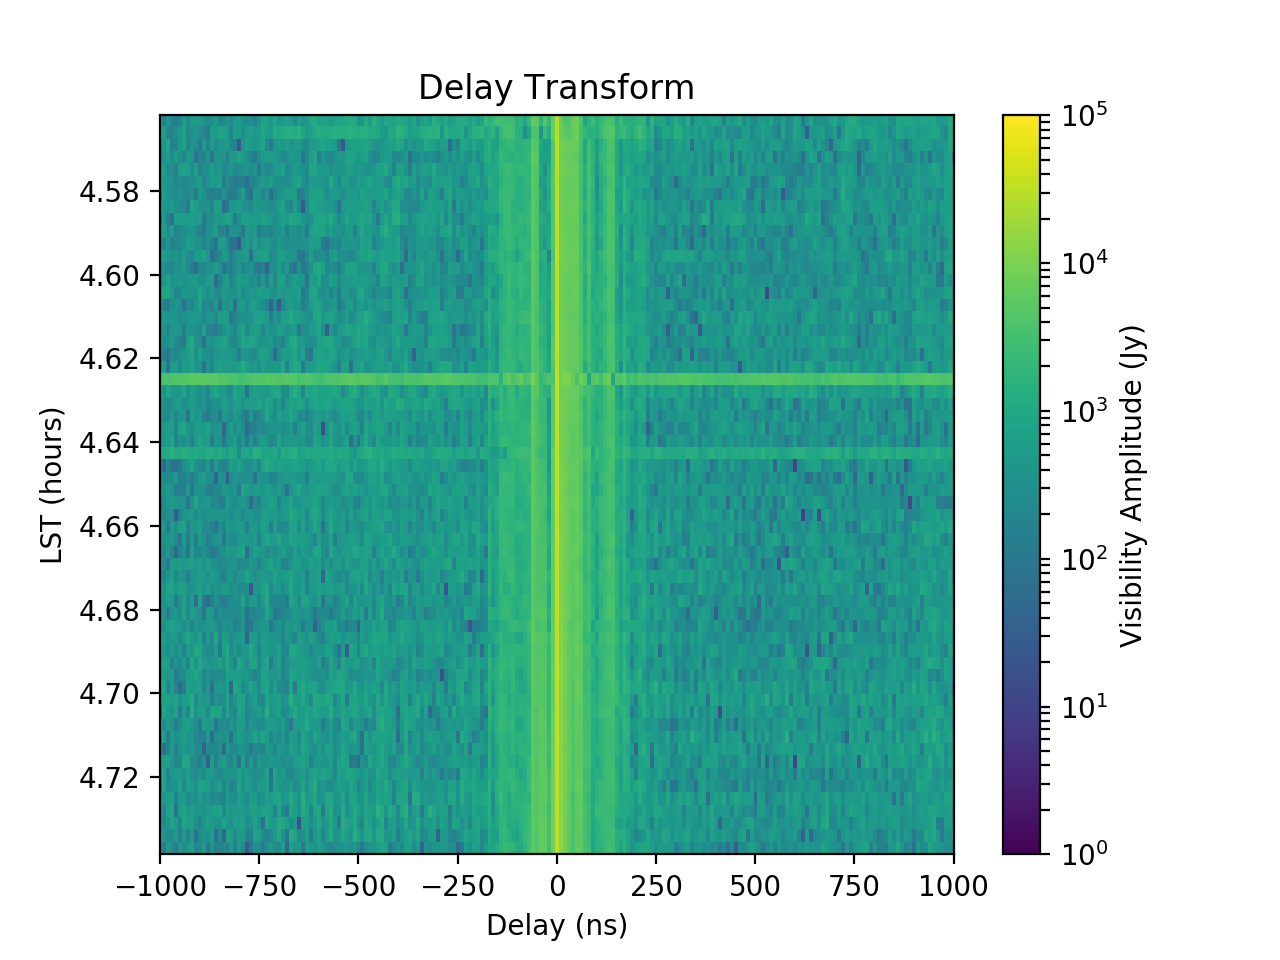

In [11]:
key = (53,54,'xx') # sample baseline and pol 
vis = uvd.get_data(key) # get data

# 1) Fourier transform "vis" along the frequency axis (don't forget to fftshift after)
#vis_dt = # your answer here 
vis_dt = np.fft.fftshift(np.fft.fft(vis,axis=1),axes=1) # Fourier-transform along frequency

# 2) Find the frequency width of a channel in GHz
#freq_width = # your answer here
freq_width = (np.max(uvd.freq_array)-np.min(uvd.freq_array))/uvd.Nfreqs/1e9 # GHz

#3) Convert frequencies to delays. Numpy's fftfreq function takes two arguments: 
#   the number of frequencies, and the frequeny width you calculated above
#delays = # your answer here
delays = np.fft.fftshift(np.fft.fftfreq(uvd.Nfreqs,freq_width)) 

plt.figure()
plt.imshow(np.abs(vis_dt), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e5),
          extent=(np.min(delays),np.max(delays),
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Delay (ns)')
plt.ylabel('LST (hours)')
plt.xlim(-1000,1000) # zoom-in
plt.title('Delay Transform');

Yuck! What happened? All that bright RFI - which are very well localized in frequency space - has spread out in delay space, causing those bright horizontal streaks.

Luckily, we flag RFI in our pipeline and the flags are saved as `uvd.get_flags(key)`. 

Exercise: Plot a waterfall plot of the flags.

<IPython.core.display.Javascript object>


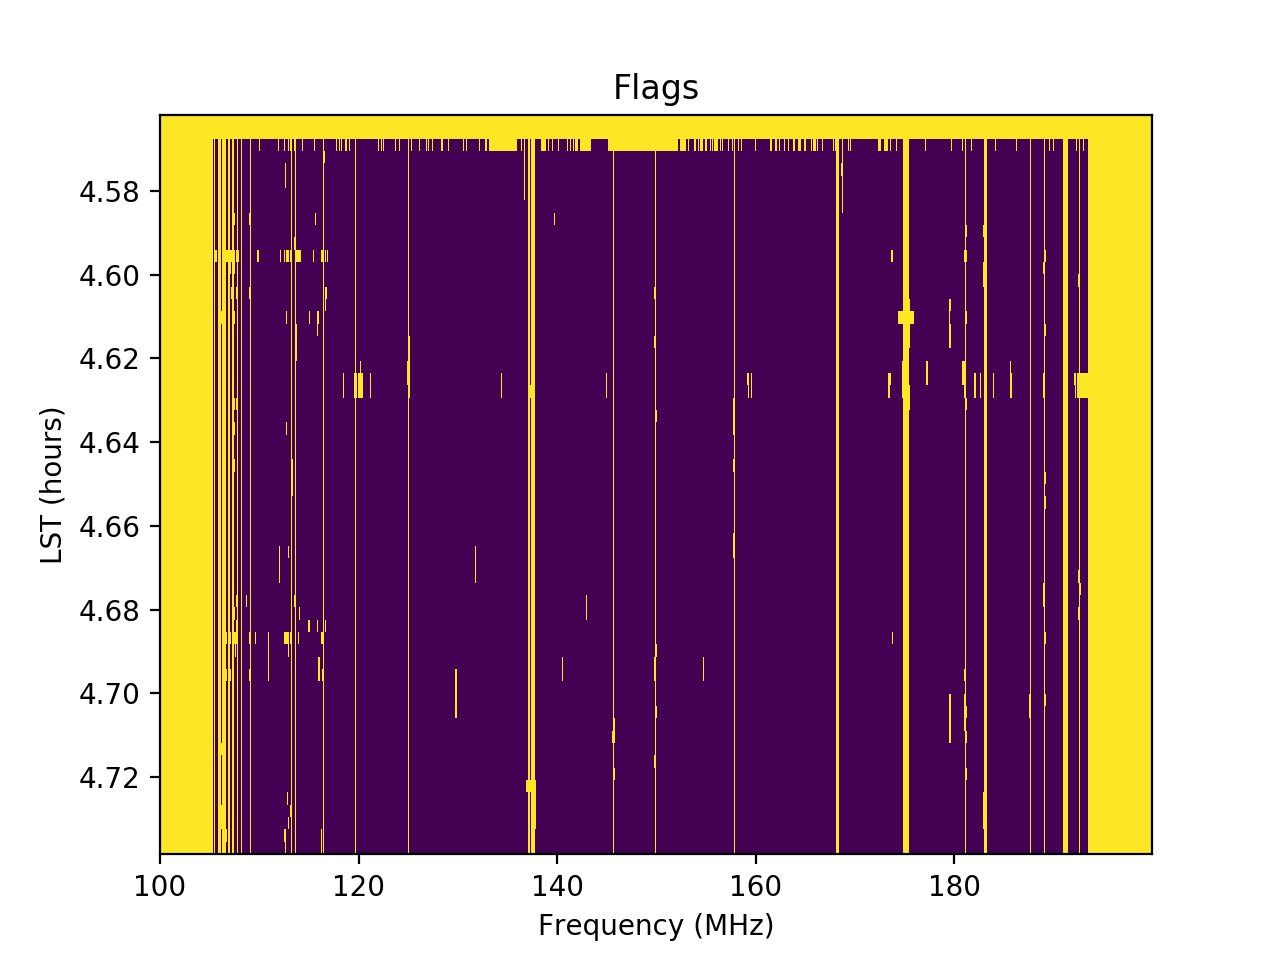

In [12]:
# your answer here

plt.figure()
plt.imshow(uvd.get_flags(key), aspect='auto',
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Flags');

Exericse: Now plot the delay transform again, but this time multiply the visibility data by `~uvd.get_flags(key)` (the tilde is to invert the flags, because the saved flags have 1's where the flags are).

<IPython.core.display.Javascript object>


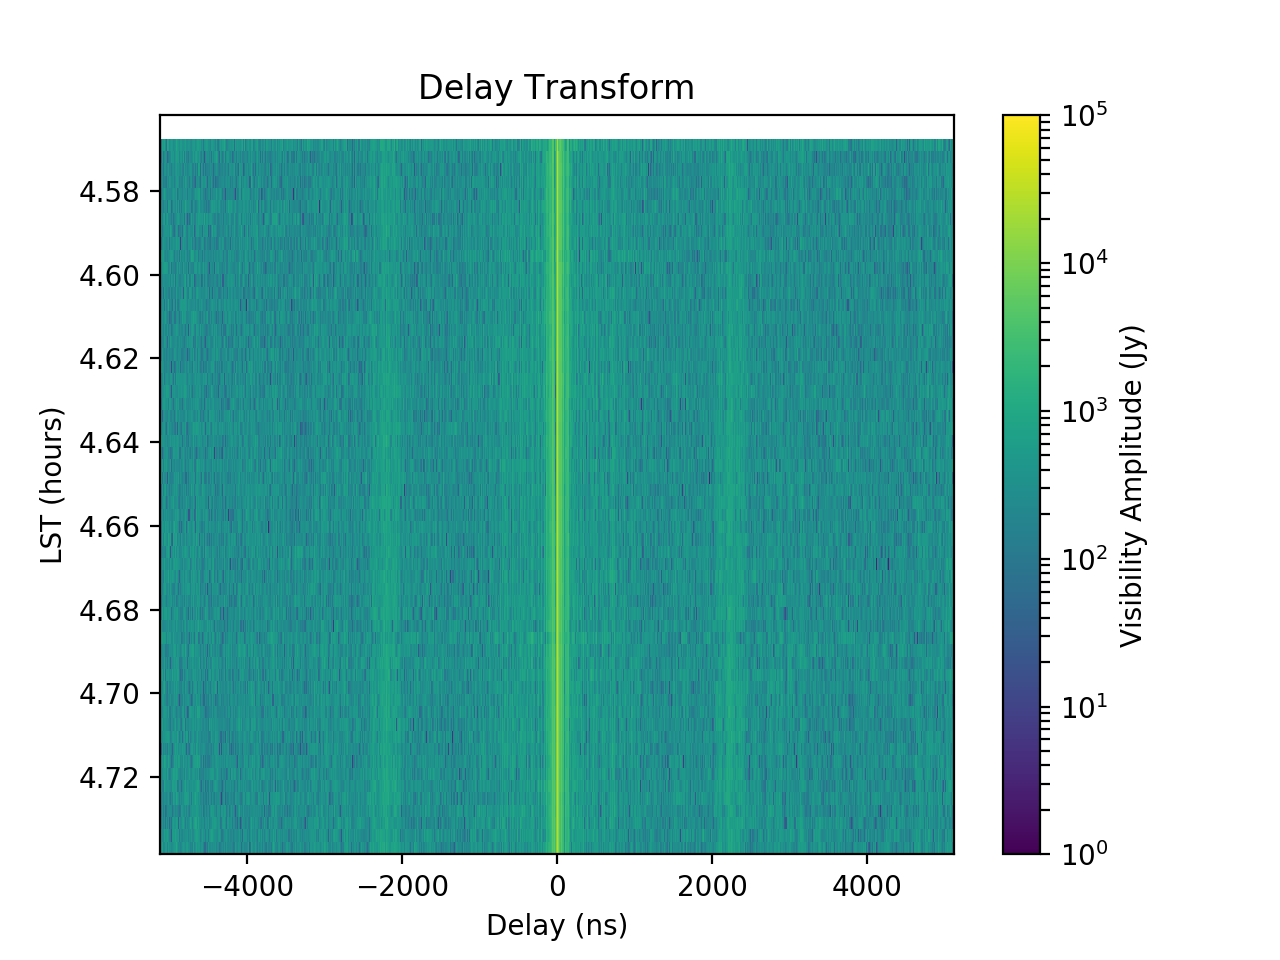

In [13]:
# your answer here

vis = uvd.get_data(key)*~uvd.get_flags(key)

vis_dt = np.fft.fftshift(np.fft.fft(vis,axis=1),axes=1) # Fourier-transform along frequency
freq_width = (np.max(uvd.freq_array)-np.min(uvd.freq_array))/uvd.Nfreqs/1e9 # GHz
delays = np.fft.fftshift(np.fft.fftfreq(uvd.Nfreqs,freq_width)) # convert frequencies to delays

plt.figure()
plt.imshow(np.abs(vis_dt), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e5),
          extent=(np.min(delays),np.max(delays),
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Delay (ns)')
plt.ylabel('LST (hours)')
#plt.xlim(-1000,1000)
plt.title('Delay Transform');

That's better. So what do we see here? All the bright stuff at low delay values correspond to bright foreground sources that are smooth in frequency (and therefore "peaky" in delay). This is nice for us because we've isolated the foregrounds and we can filter them out easily in this space.

Let's think about what "delay" means physically. A delay can be thought of as the time difference between when a lightwave hits one antenna and when it hits the second antenna. In other words, there is a time lag between light hitting each antenna depending on the direction it comes from and the orientation of the baseline.

Where would the light have to be coming from for the time delay to be zero? Where would it need to be coming from to produce a maximum delay (hint: we call this the horizon limit)?

Exercise: For the baseline we picked earlier, calculate the theoretical maximum delay (in nanoseconds), using $t = d/c$, where $t$ is the time delay, $d$ is the baseline distance, and $c$ is the speed of light. You can calculate the baseline distance using the saved `antpos` and `ants` variables from earlier, or approximate it using the antenna layout plot.

In [14]:
# your answer here

a1,a2 = key[0],key[1] # antennas involved in the baseline
print 'Antennas:',a1,a2

ind1 = np.where(ants == a1)[0] # where in antenna list the first antenna is
ind2 = np.where(ants == a2)[0] # where in antenna list the second antenna is
x1,y1 = antpos[ind1][0][0], antpos[ind1][0][1] # x and y coordinate values for the first antenna
x2,y2 = antpos[ind2][0][0], antpos[ind2][0][1] # x and y coordinate values for the second antenna
d = np.sqrt((x1-x2)**2 + (y1-y2)**2) # baseline distance in meters

c = 3e8 # speed of light in m/s
t = d/c * 1e9 # time delay in ns
print 'Time Delay:', np.round(t), 'ns'

Antennas: 53 54
Time Delay: 49.0 ns


A cool trick for a faster calculation is to convert your distance $d$ to feet. That number is also approximately the time delay in nanoseconds! 

Also note that the foregrounds in our delay-transform plot spread out past this horizon limit. This is due to reflections and other effects. But, they are still well isolated and we can now filter them out!

<IPython.core.display.Javascript object>


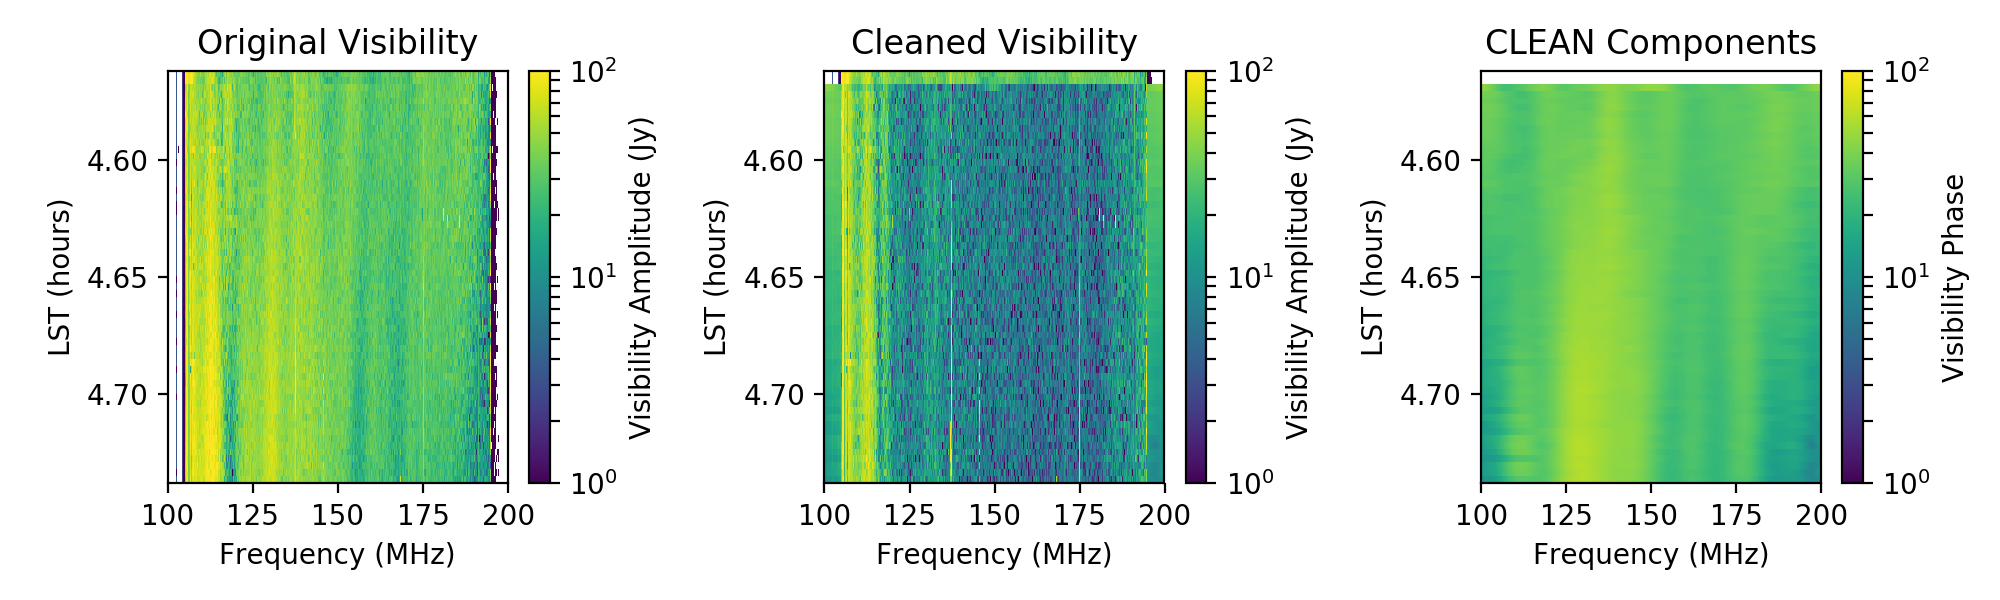

In [15]:
from hera_cal import delay_filter

df = delay_filter.Delay_Filter() # establish delay filter object
df.load_data(uvd) # load UVData object
df.run_filter(to_filter=[key]) # filter the specific key we want (otherwise it takes a long time to do all keys)

vis_df = df.filtered_residuals[key] # filtered visibility (i.e. the cleaned visibility)
clean = df.CLEAN_models[key] # low delay modes we don't want (i.e. the stuff that gets filtered out)

# Plot
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.imshow(np.abs(uvd.get_data(key)), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Original Visibility')

plt.subplot(132)
plt.imshow(np.abs(vis_df), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('Cleaned Visibility')

plt.subplot(133)
plt.imshow(np.abs(clean), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Phase')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('CLEAN Components')

plt.tight_layout();

Comparing the left and middle plots, we see that we've reduced the amplitude of our visibility by a couple orders of magnitude! We also see that some of the foreground structure we see in the left plot has been removed, as the middle plot looks more noise-like. Delay-filtering is a crucial step of the HERA analysis pipeline - afterall, we are trying to find a tiny signal (the 21cm EoR signal) buried underneath a lot of stuff we don't care about!

# E) Extra Credit Exercises

1) Loop through all antennas and look at their auto-correlations (correlations between the same antennas, like (53,53) for example) to identify which antennas are dead/don't have data. Color those antennas red on the antenna layout plot.

2) Pick a baseline with obvious RFI in its visibility. Write an algorithm to identity the RFI, and compare your results to the actual flags.

3) Pick a baseline type (a common one in the array) and make a list containing all those redundant baselines. Then loop through them and run the delay filter on each visibility. Stack all the delay-filtered visibilities (average them). How much sensitivity did you gain by filtering and averaging?

Dead Antennas: [136, 50, 98, 0, 2, 26]


<IPython.core.display.Javascript object>


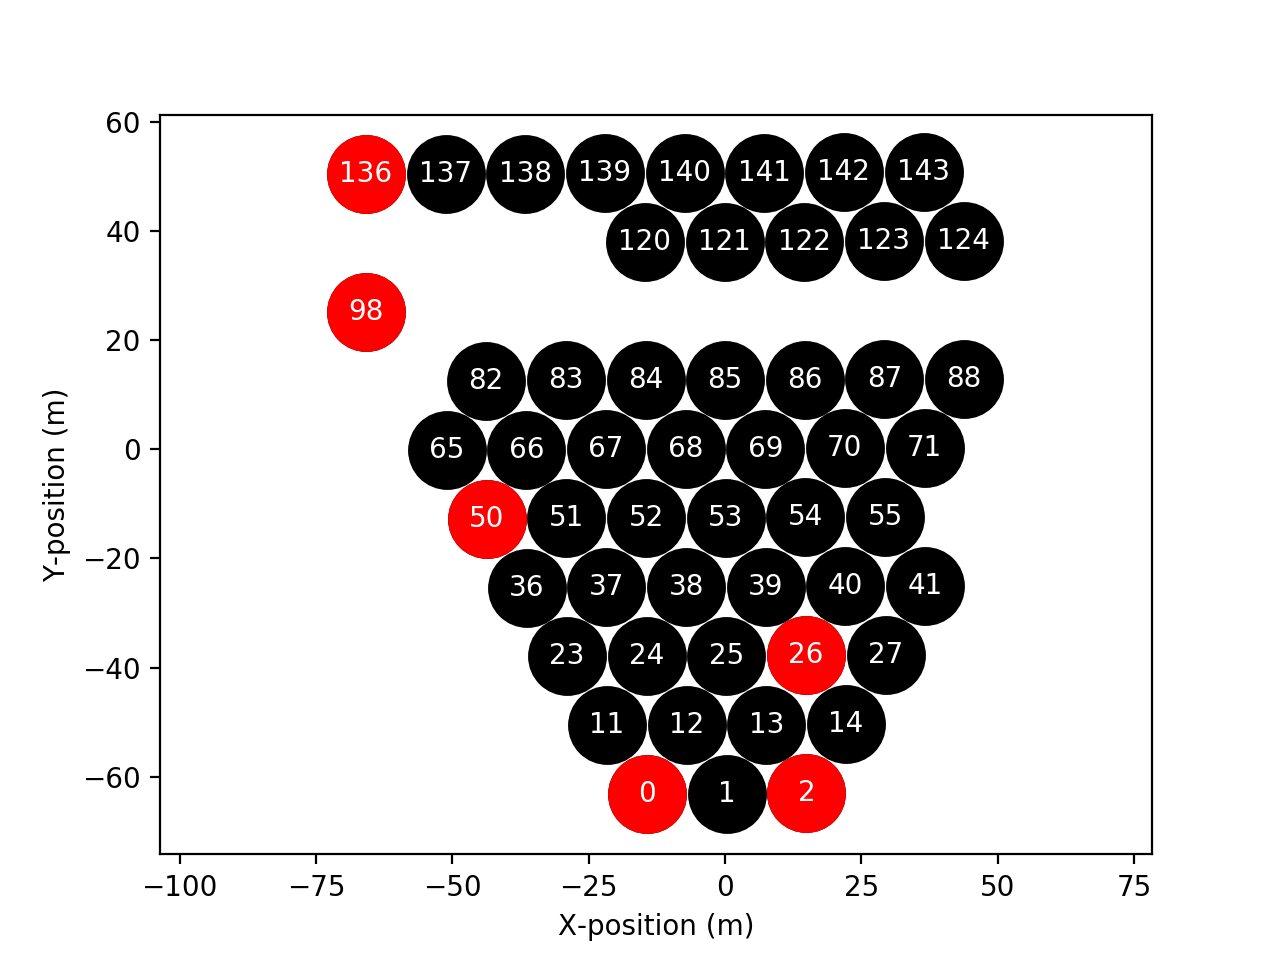

<IPython.core.display.Javascript object>


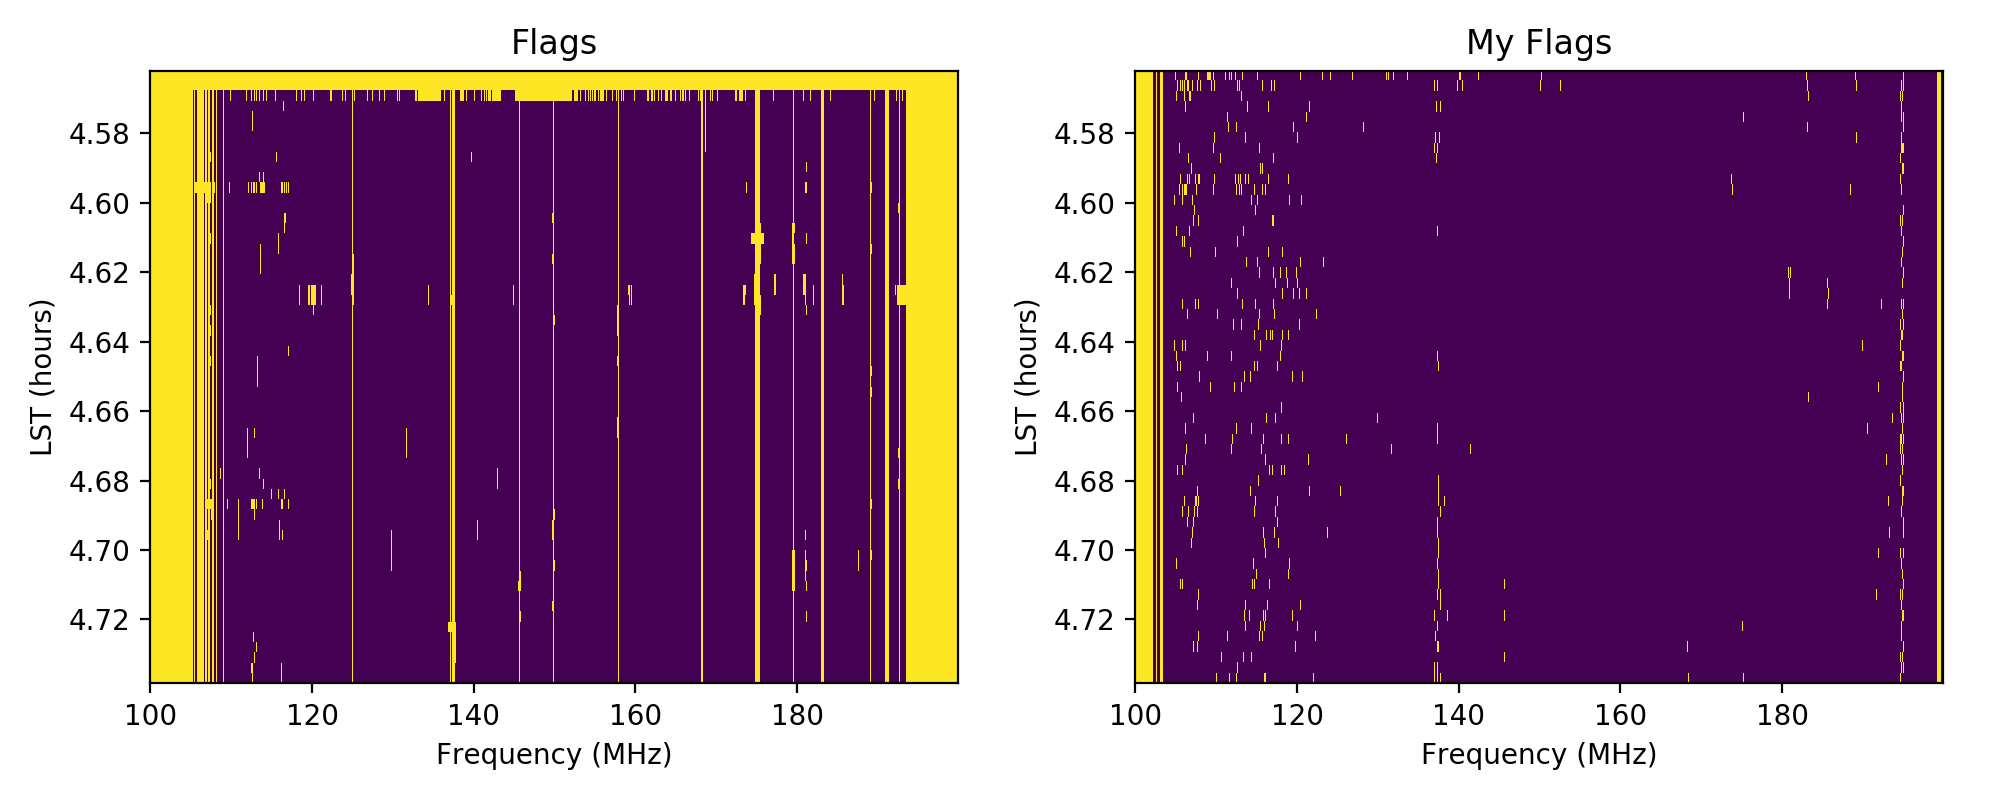

<IPython.core.display.Javascript object>


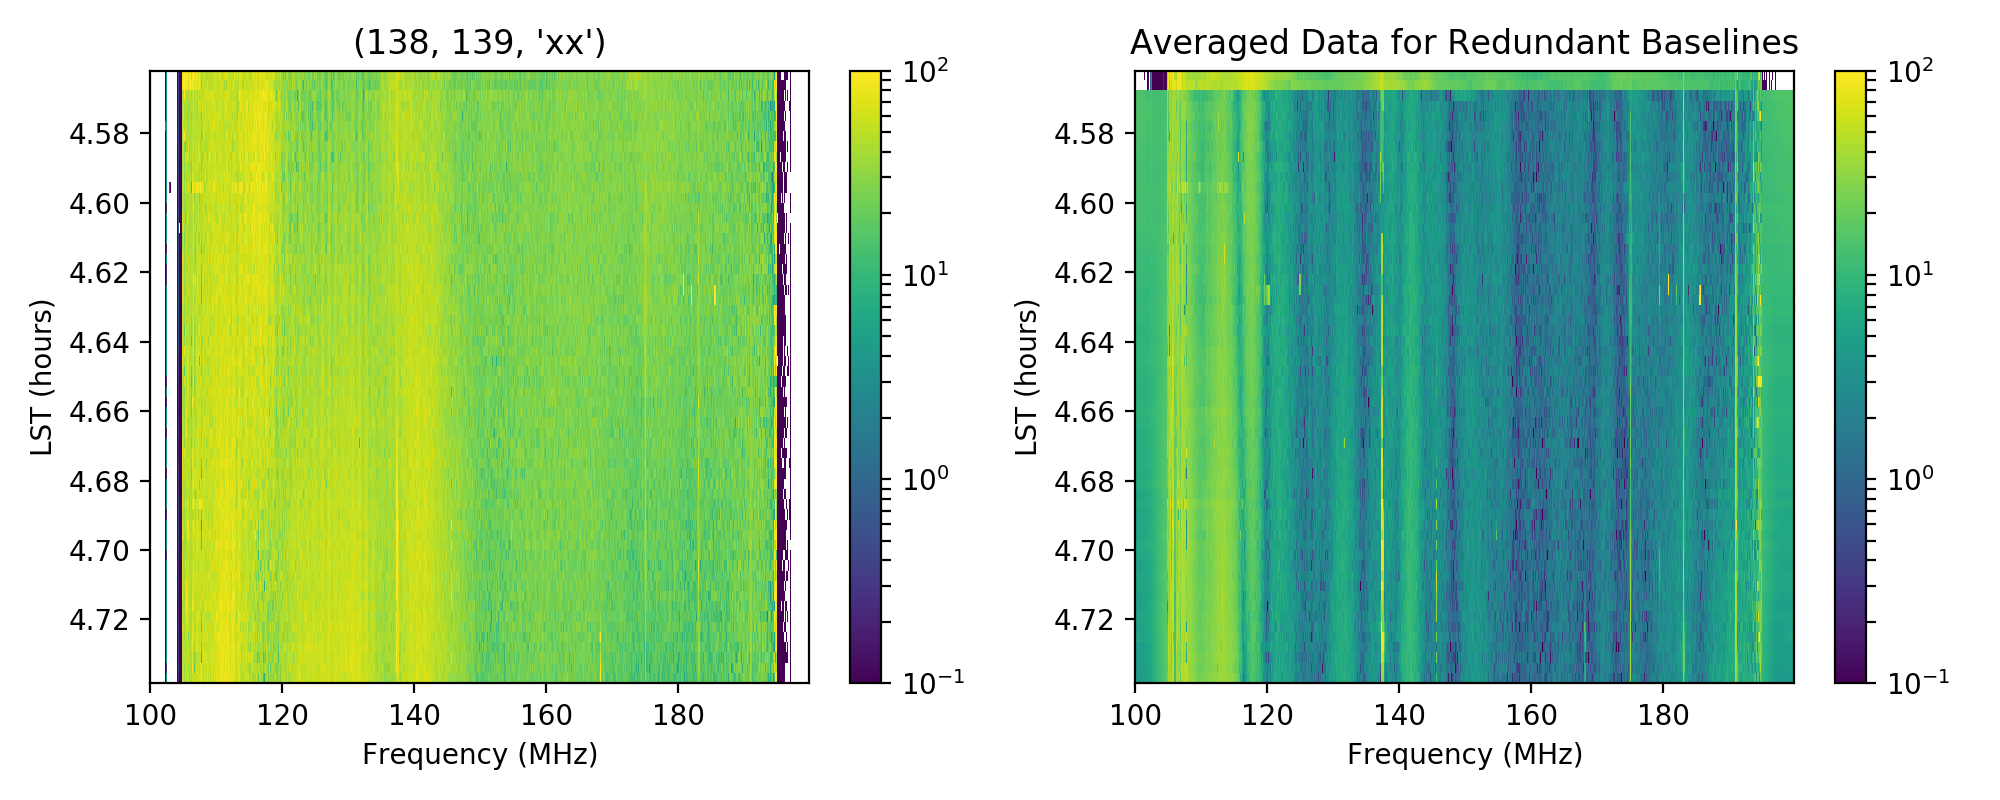

In [15]:
# Exercise 1
dead_ants = [] # will hold dead antennas
for ant in ants: # loop over antennas
    auto = uvd.get_flags((ant,ant,'xx')) # get auto-correlation flags
    if np.all(auto): # if all flags are True 
        dead_ants.append(ant)
print 'Dead Antennas:',dead_ants
plt.figure()
plt.scatter(antpos[:,0], antpos[:,1], marker='.', color='k', s=3000) # plot the antenna positions with black circles
for aa,ant in enumerate(ants): # loop over antennas
    plt.text(antpos[aa,0], antpos[aa,1], ants[aa], color='w', va='center', ha='center') # label antenna numbers
    if ant in dead_ants: plt.scatter(antpos[aa,0], antpos[aa,1], marker='.', color='r', s=3000) # override with red
plt.xlabel('X-position (m)')
plt.ylabel('Y-position (m)')
plt.axis('equal');

# Exercise 2
key = (38,68,'xx')
data = uvd.get_data(key)
# My simple flagger will difference the data along time and frequency 
# and look for values (derivatives, or sudden changes) that deviate more than 1-sigma from the mean
data = np.diff(data, axis=0) # difference along time
data = np.diff(data, axis=1) # difference along freq
mean_data = np.mean(data) # mean 
std_data = np.std(data) # std 
my_flags = np.zeros(data.shape) # all zero flags
my_flags[np.where(data > mean_data + 1*std_data)] = 1 # make the flag equal to 1
for f in range(data.shape[1]): # loop over freqs
    if np.all(data[:,f] == 0): my_flags[:,f] = 1 # if data is 0 for all times, flag it
plt.figure(figsize=(10,4))
plt.subplot(121)
orig_flags = uvd.get_flags(key)
plt.imshow(orig_flags, aspect='auto', 
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.title("Flags")
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.subplot(122)
plt.imshow(my_flags, aspect='auto', 
        extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.title("My Flags")
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.tight_layout();

# Exercise 3
bls_red = [] # redundant baselines
for aa,a1 in enumerate(ants): # loop over all antenna pairs (all baselines) to find 14-m E/W redundant baselines
    for a2 in ants[aa:]:
        ind1 = np.where(ants == a1)[0][0] # index of antenna 1
        ind2 = np.where(ants == a2)[0][0] # index of antenna 2
        antpos_diff = np.abs(antpos[ind1] - antpos[ind2]) # difference in antenna position
        if np.abs(antpos_diff[0]-14) < 1 and antpos_diff[1] < 0.5: bls_red.append((a1,a2))
stacked_vis = []
for bl in bls_red: # loop over redundant baselines
    key = (bl[0],bl[1],'xx')
    data = uvd.get_data(key)
    df = delay_filter.Delay_Filter() 
    df.load_data(uvd) 
    df.run_filter(to_filter=[key]) # run delay filter
    vis_df = df.filtered_residuals[key] 
    stacked_vis.append(vis_df) # save cleaned visibility
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(np.abs(data), aspect='auto', norm=matplotlib.colors.LogNorm(1e-1,1e2),
          extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.title(key)
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.abs(np.mean(stacked_vis,axis=0)), aspect='auto', norm=matplotlib.colors.LogNorm(1e-1,1e2),
        extent=(np.min(uvd.freq_array[0])/1e6,np.max(uvd.freq_array[0])/1e6,
                  np.max(np.unique(uvd.lst_array))*12/np.pi,np.min(np.unique(uvd.lst_array))*12/np.pi))
plt.title("Averaged Data for Redundant Baselines")
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.colorbar()
plt.tight_layout();